# Getting Started

In [1]:
# @title Necessary imports and globals.
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf
import pandas as pd

BASE_PATH = 'running-data'  # @param

In [2]:
experimental_data = colab_utils.load_baselines('./baselines-data/')

# Make the plot

This function calculates the relative performance difference between PER-SR and PER. 0 percent means identical performance.

In [3]:
def relative_performance(game):
    GAME = game
    LOG_PATH = os.path.join(BASE_PATH, 'prioritized_srdqn_normalized', GAME)
    
    # @title Load the training logs.
    plain_dqn_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
    plain_dqn_data['agent'] = 'PER-SR-magnitude'
    plain_dqn_data['run_number'] = 1
    experimental_data[GAME] = experimental_data[GAME].merge(plain_dqn_data, how='outer')
    
    LOG_PATH = os.path.join(BASE_PATH, 'prioritized_dqn', GAME)
    plain_dqn_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
    plain_dqn_data['agent'] = 'PER'
    plain_dqn_data['run_number'] = 1
    experimental_data[GAME] = experimental_data[GAME].merge(plain_dqn_data, how='outer')
    
    data = experimental_data[GAME]
    comparison = data[data['agent'] == 'PER-SR-magnitude']['train_episode_returns'].max() / data[data['agent'] == 'PER']['train_episode_returns'].max() - 1
    
    return comparison

In [4]:
games = ['Asterix', 'BattleZone', 'Berzerk', 'Boxing', 'StarGunner', 'Qbert', 'Robotank', 'SpaceInvaders', 'Pooyan', 'Tennis', 'Gopher', 'Hero', 'TimePilot', 'Zaxxon', 'DemonAttack']
all_ratio = []
for game in games:
    ratio = relative_performance(game)
    all_ratio.append([game, ratio])
    
ratios = pd.DataFrame(all_ratio, columns=['game', 'ratio'])

Reading statistics from: running-data\prioritized_srdqn_normalized\Asterix\logs\log_199
Reading statistics from: running-data\prioritized_dqn\Asterix\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\BattleZone\logs\log_199
Reading statistics from: running-data\prioritized_dqn\BattleZone\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\Berzerk\logs\log_190
Reading statistics from: running-data\prioritized_dqn\Berzerk\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\Boxing\logs\log_199
Reading statistics from: running-data\prioritized_dqn\Boxing\logs\log_196
Reading statistics from: running-data\prioritized_srdqn_normalized\StarGunner\logs\log_199
Reading statistics from: running-data\prioritized_dqn\StarGunner\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\Qbert\logs\log_199
Reading statistics from: running-data\prioritized_dqn\Qbert\logs\log_199
Reading statisti

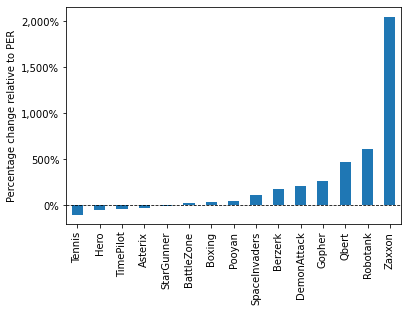

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = ratios.sort_values(by=['ratio']).plot.bar(x="game", y="ratio")
ax.set_xlabel("")
ax.set_ylabel("Percentage change relative to PER")
ax.axhline(y = 0, color='k', lw=0.8, ls='--')
ax.get_legend().remove()

# set y axis in percentage
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.savefig('relativeperf.eps', format='eps', bbox_inches='tight')

In [6]:
def get_data(game):
    GAME = game
    LOG_PATH = os.path.join(BASE_PATH, 'prioritized_srdqn_normalized', GAME)
    
    # @title Load the training logs.
    plain_dqn_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
    plain_dqn_data['agent'] = 'PER-SR-magnitude'
    plain_dqn_data['run_number'] = 1
    experimental_data[GAME] = experimental_data[GAME].merge(plain_dqn_data, how='outer')
    
    LOG_PATH = os.path.join(BASE_PATH, 'prioritized_dqn', GAME)
    plain_dqn_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
    plain_dqn_data['agent'] = 'PER'
    plain_dqn_data['run_number'] = 1
    experimental_data[GAME] = experimental_data[GAME].merge(plain_dqn_data, how='outer')
    
    data = experimental_data[GAME]
    comparison = pd.concat([data[data['agent'] == 'PER'], data[data['agent'] == 'PER-SR-magnitude']])
    
    return comparison

Reading statistics from: running-data\prioritized_srdqn_normalized\Asterix\logs\log_199
Reading statistics from: running-data\prioritized_dqn\Asterix\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\BattleZone\logs\log_199
Reading statistics from: running-data\prioritized_dqn\BattleZone\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\Berzerk\logs\log_190
Reading statistics from: running-data\prioritized_dqn\Berzerk\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\Boxing\logs\log_199
Reading statistics from: running-data\prioritized_dqn\Boxing\logs\log_196
Reading statistics from: running-data\prioritized_srdqn_normalized\StarGunner\logs\log_199
Reading statistics from: running-data\prioritized_dqn\StarGunner\logs\log_199
Reading statistics from: running-data\prioritized_srdqn_normalized\Qbert\logs\log_199
Reading statistics from: running-data\prioritized_dqn\Qbert\logs\log_199
Reading statisti

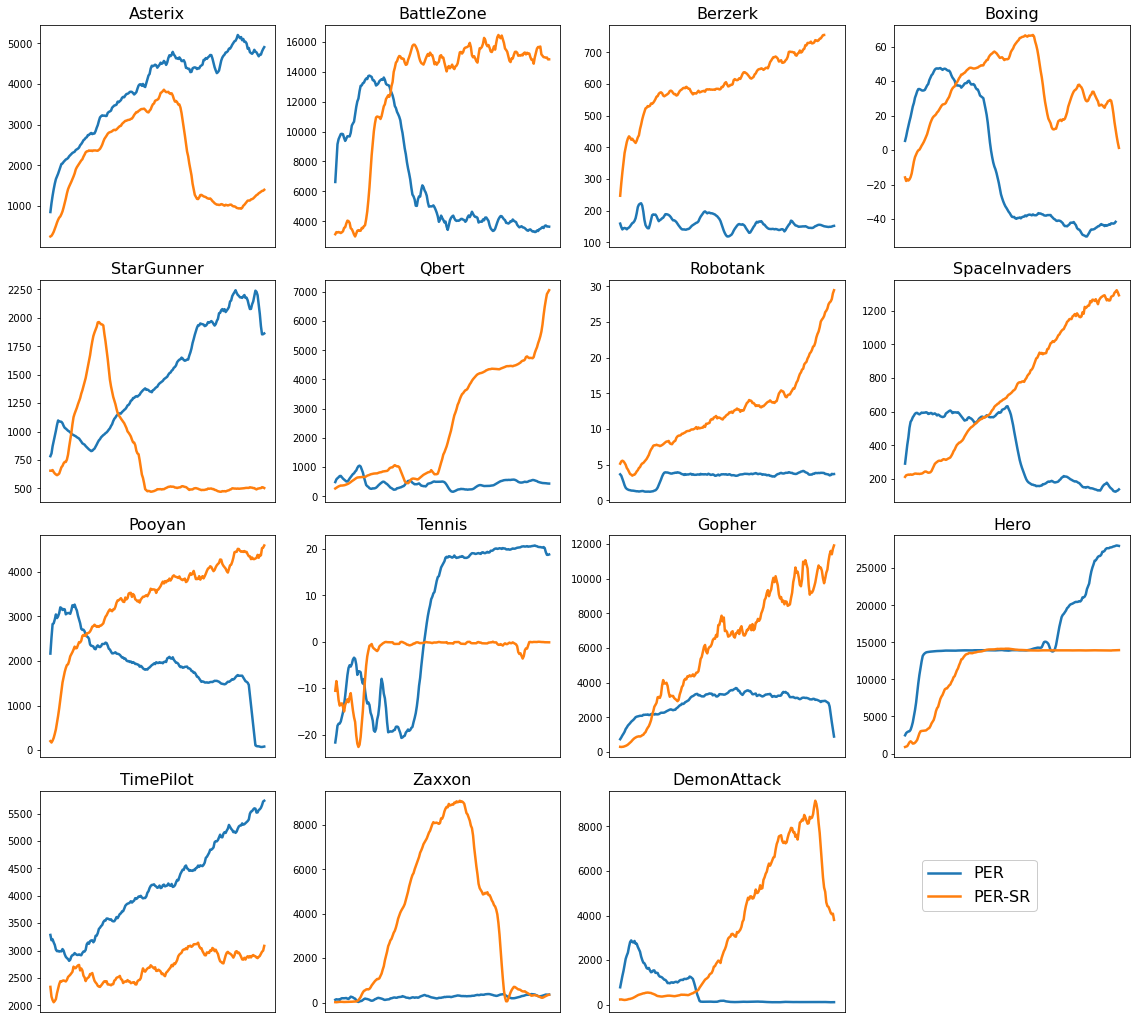

In [7]:
games = ['Asterix', 'BattleZone', 'Berzerk', 'Boxing', 'StarGunner', 'Qbert', 'Robotank', 'SpaceInvaders', 'Pooyan', 'Tennis', 'Gopher', 'Hero', 'TimePilot', 'Zaxxon', 'DemonAttack']
num_cols = 4
num_rows = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16,14.5))
for i in range(len(games)):
    game = games[i]
    comparison = get_data(game)
    curr_ax = axs[i // num_cols, i % num_cols]
    sns.lineplot(x='iteration', y='train_episode_returns', data=comparison[comparison['agent'] == 'PER'].rolling(6).mean(), ax=curr_ax, linewidth=2.5)
    sns.lineplot(x='iteration', y='train_episode_returns', data=comparison[comparison['agent'] == 'PER-SR-magnitude'].rolling(6).mean(), ax=curr_ax, linewidth=2.5)
    curr_ax.set_title(game, fontsize=16)
    curr_ax.set(xlabel=None)
    curr_ax.set(ylabel=None)
    if curr_ax.get_legend():
        curr_ax.get_legend().remove()
    curr_ax.axes.get_xaxis().set_visible(False)

# add margins
fig.tight_layout()
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(['PER', 'PER-SR'], loc='lower center', fontsize=16, bbox_to_anchor=[0.85, 0.1], facecolor='white', framealpha=1)

# axs[2, 2].axis('off')
axs[3, 3].axis('off')

plt.savefig('curves.eps', format='eps')
plt.show()